# Seaborn을 활용한 시각화
pip install seaborn 을 통해서 툴을 받아야 한다.

In [1]:
# %matplotlib만을 사용하여 그래프를 작성해 보자 - 차이점 알기
#옵션사항 넣기
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt





<function matplotlib.pyplot.show(*args, **kw)>

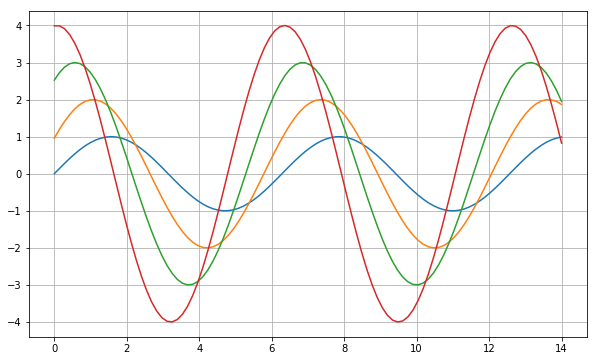

In [10]:
x = np.linspace(0,14,100) # 독립변수
y1 = np.sin(x)  # 종속변수 (x에 종속되어 있음)
y2 = 2*np.sin(x+0.5)
y3 = 3*np.sin(x+1.0)
y4 = 4*np.sin(x+1.5)

plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.grid()
plt.show









In [11]:
# seaborn을 이용한 그래프 그리기
import seaborn as sns





<function matplotlib.pyplot.show(*args, **kw)>

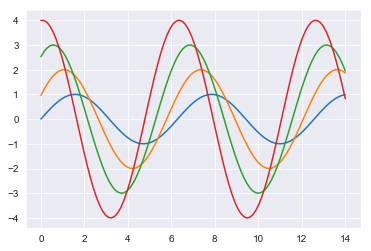

In [13]:
#sns.set_style('whitegrid')  # seaborn의 whitegrid 스타일 - 피규어 그리드를 쓰지 않아도 된다.
sns.set_style('darkgrid') # seaborn의 darkgrid 스타일 - 피규어 그리드를 쓰지 않아도 된다.
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show





In [14]:
#seaborn에 그림그리기 연습하기 위해서 seaborn에 삽입된 샘플데이터셋을 이용해서 연습
# tips : 요일별 점심, 저녁, 흡연여부, 식사금액, 팁
sns.set_style('whitegrid')
tips = sns.load_dataset('tips')
tips.head()





,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
# tips 정보 확인
tips.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


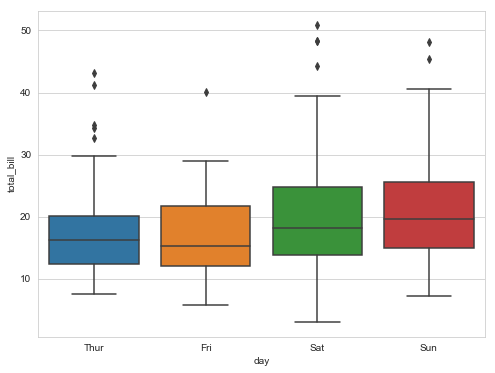

In [18]:
# boxplot으로 보기 x축은 day, y축은 total_bill
plt.figure(figsize=(8,6))
sns.boxplot(x='day',y='total_bill',data=tips)
plt.show()
# 중앙값과 min값 max값을 보면 비싼음식을 시켰나 아닌가 알 수 있다
# 위의 쩜쩜은 이상치  토요일에 큰금액들이 발생! 왜일까?





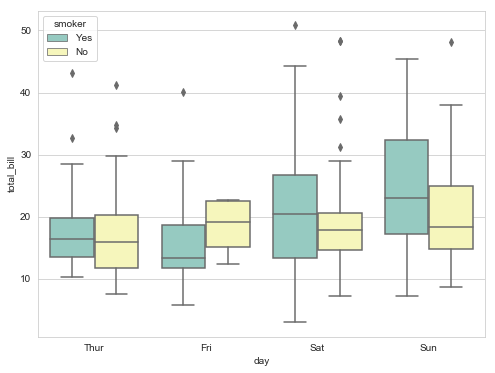

In [22]:
# hue option - 얘때문에 sns를 많이 사용한다. 이것을 사용하여 데이터 추가하고 비교하기
plt.figure(figsize=(8,6))
sns.boxplot(x='day',y='total_bill',hue='smoker',palette='Set3',data=tips) # palette='Set3'은 색깔 조절
plt.show()





흡연자의 결제범위가 크다.

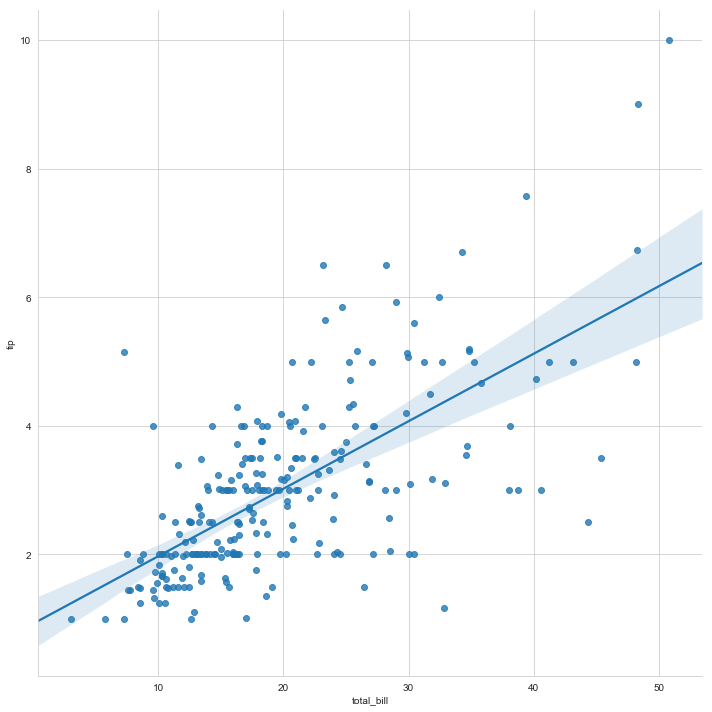

In [25]:
# 결재금액과 팁에 대한 상관을 그래프로
# lmplot : 적절한 상관계수를 확인
sns.lmplot(x='total_bill',y='tip',data=tips,height=10) # 팁이 10달러인것 까지 보겠다?
plt.show()





위의 그래프는 결재금액에 따른 적절한 팁액수를 확인가능
total_bill과 tip은 양의 상관관계를 갖는다.

In [28]:
# 상관관계가 굉장히 높다.
tips['total_bill'].corr(tips['tip'])





0.6757341092113646

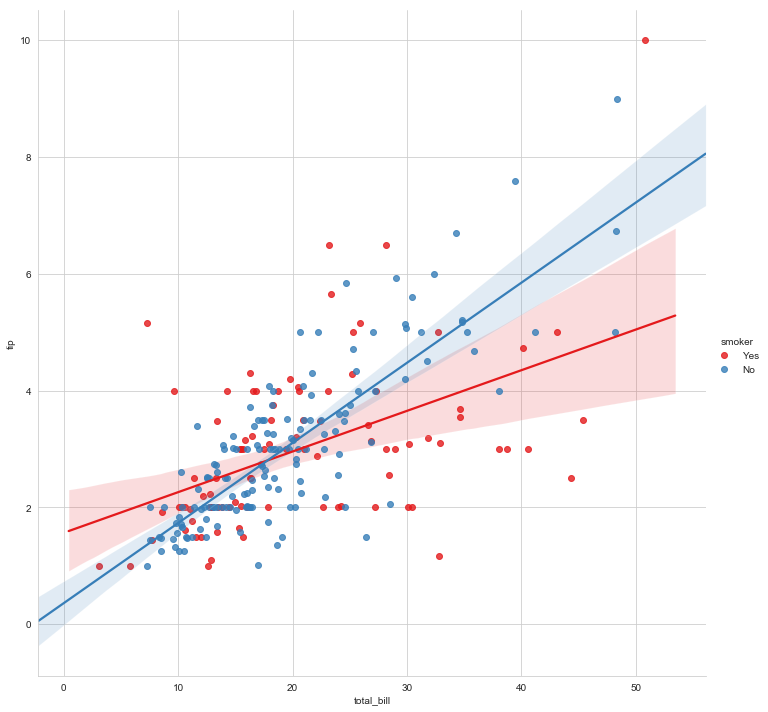

In [31]:
# hue option을 사용하여 흡연자와 비흡연자의 비교
sns.lmplot(x='total_bill',y='tip',hue='smoker',data=tips, height=10, palette='Set1') #구분을 흡연자로 하라





total_bill이 약 18이전에는 tip이 smoker가 많으나 18이후에는 tip이 non-smoker가 많음을 알 수 있다.

# 샘플데이터 연도별 월별 항공기 승객

In [36]:
flights = sns.load_dataset('flights')
flights.head()





,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [40]:
# 연도별 월별 항공기 승객 수 구분
flights = filghts.pivot('month','year','passengers') #pivot_table은 aggfunc 함수가 있어야 한다 없이 하려면 pivot
flights





year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


# Heatmap을 이용하여 승객수를 색상으로 표현하기.

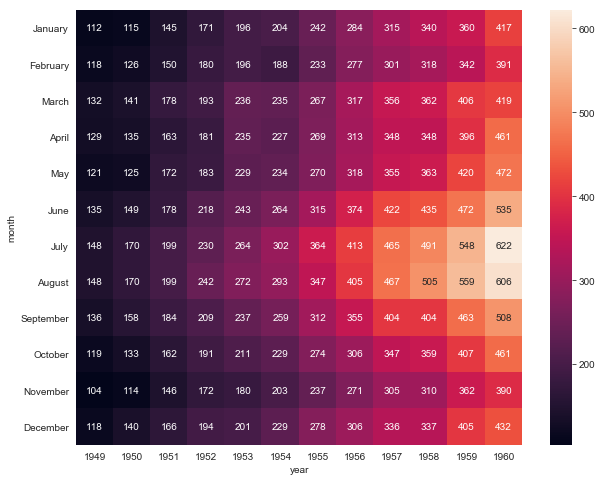

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(flights,annot=True,fmt='d') #annot 숫자 보여주기(승객수보여주기) / fmt (f:float(.2f) , d:digit )
plt.show()





# 상관분포도(pairplot) 로 각 항목 비교

In [51]:
# iris dataset 불러오기 - 옛사람이 붓꽃의 3 종류를 분류해 놓은 것을 -데이터 분석해보니 맞았다 개쩐다. 이 데이터를 iris라함





In [52]:
iris = sns.load_dataset('iris')
iris.head()





,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\GSCHOI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


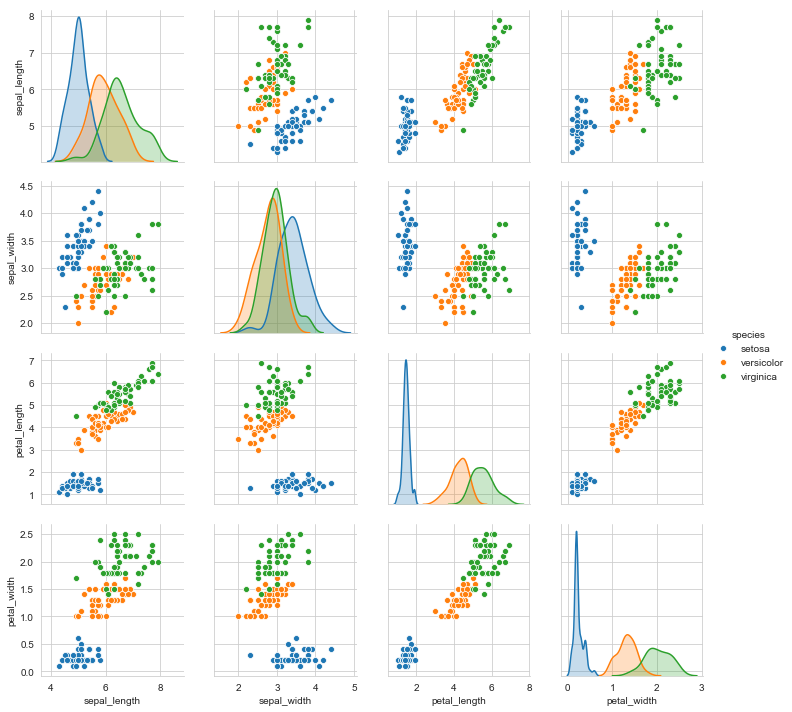

In [53]:
# 꽃의 종별로 길이넗이가 달라. 그것을 상관분포도를 그린다. - fig를 해놔서 바로 그릴 수 있는거야.
sns.pairplot(iris,hue='species')
plt.show()



